In [13]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'e0753dc6-1c7d-4c20-873b-7027e25532b9',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)
  

{'status': {'timestamp': '2023-09-27T14:59:18.997Z', 'error_code': 0, 'error_message': None, 'elapsed': 37, 'credit_count': 1, 'notice': None, 'total_count': 9074}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10479, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [14]:
type(data)

dict

In [15]:
import pandas as pd

pd.set_option('display.max_columns', None)

In [16]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

C:\Users\asus\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10479,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.949744e+07,1.949744e+07,False,NaN,1,NaN,NaN,None,2023-09-27T14:57:00.000Z,26195.284511,1.095883e+10,5.0812,-1.449306,0.080192,-3.517428,0.326106,-10.536665,-13.956037,5.107411e+11,48.8962,5.501010e+11,None,2023-09-27T14:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-27 14:59:23.286490
1,1027,Ethereum,ETH,ethereum,7444,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202339e+08,1.202339e+08,True,NaN,2,NaN,NaN,None,2023-09-27T14:57:00.000Z,1595.224454,5.053428e+09,31.3071,-1.348917,0.665573,-2.057640,-3.238135,-14.799835,-13.799118,1.918000e+11,18.3642,1.918000e+11,None,2023-09-27T14:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-27 14:59:23.286490
2,825,Tether USDt,USDT,tether,62888,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.326685e+10,8.642620e+10,True,NaN,3,NaN,NaN,None,2023-09-27T14:57:00.000Z,0.999241,2.032636e+10,16.2105,-0.024062,-0.041007,-0.075928,-0.030025,-0.076150,-0.104724,8.320365e+10,7.9664,8.636060e+10,None,2023-09-27T14:57:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-09-27 14:59:23.286490
3,1839,BNB,BNB,bnb,1642,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.538470e+08,1.538470e+08,False,NaN,4,NaN,NaN,None,2023-09-27T14:57:00.000Z,211.817042,7.572806e+08,23.9725,-1.074853,0.177569,-1.949926,-3.001496,-12.389591,-9.123554,3.258742e+10,3.1201,3.258742e+10,None,2023-09-27T14:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-27 14:59:23.286490
4,52,XRP,XRP,xrp,1099,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.324524e+10,9.998841e+10,False,NaN,5,NaN,NaN,None,2023-09-27T14:57:00.000Z,0.499894,7.873585e+08,0.8799,-0.926671,-0.422394,-3.048361,-3.666199,-29.410253,6.511629,2.661699e+10,2.5485,4.998943e+10,None,2023-09-27T14:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-27 14:59:23.286490
5,3408,USDC,USDC,usd-coin,14239,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.553730e+10,2.553730e+10,False,NaN,6,NaN,NaN,None,2023-09-27T14:57:00.000Z,0.999975,2.511443e+09,-7.3593,-0.011422,-0.011851,-0.002903,-0.025324,0.002817,-0.038570,2.553666e+10,2.4450,2.553666e+10,None,2023-09-27T14:57:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-09-27 14:59:23.286490
6,2010,Cardano,ADA,cardano,939,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.512849e+10,3.619858e+10,False,NaN,7,NaN,NaN,None,2023-09-27T14:57:00.000Z,0.243130,1.030160e+08,-9.5411,-1.188230,-0.974801,-4.526141,-7.958117,-21.664046,-11.148868,8.540805e+09,0.8178,1.094087e+10,None,2023-09-27T14:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-27 14:59:23.286490
7,74,Dogecoin,DOGE,dogecoin,801,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.411795e+11,1.411795e+11,True,NaN,8,NaN,NaN,None,2023-09-27T14:57:00.000Z,0.060391,1.739155e+08,69.6210,-1.058280,-0.368691,-3.006798,-3.936330,-22.264688,-4.624133,8.525915e+09,0.8163,8.525915e+09,None,2023-09-27T14:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-27 14:59:23.286490
8,5426,Solana,SOL,solana,532,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings

In [31]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': 'e0753dc6-1c7d-4c20-873b-7027e25532b9',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df
    if not os.path.isfile(r'C:\Users\asus\Desktop\API Python\API.csv'):
         df.to_csv(r'C:\Users\asus\Desktop\API Python\API.csv', header='column_names')
                            
    else:
        df.to_csv(r'C:\Users\asus\Desktop\API Python\API.csv', mode='a', header=False)


In [29]:
import os
from time import time 
from time import sleep

for i in range(333):
    api_runner()
    print('API ran successfully!')
    sleep(60)
exit()

{'status': {'timestamp': '2023-09-27T15:27:17.175Z', 'error_code': 0, 'error_message': None, 'elapsed': 1990, 'credit_count': 1, 'notice': None, 'total_count': 9074}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10479, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'pa

C:\Users\asus\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


{'status': {'timestamp': '2023-09-27T15:28:17.588Z', 'error_code': 0, 'error_message': None, 'elapsed': 33, 'credit_count': 1, 'notice': None, 'total_count': 9074}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10479, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

C:\Users\asus\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


TypeError: to_csv() got an unexpected keyword argument 'headers'

In [30]:
dfcsv=pd.read_csv(r'C:\Users\asus\Desktop\API Python\API.csv')
dfcsv

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10479,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.949744e+07,1.949744e+07,False,NaN,1,NaN,NaN,NaN,2023-09-27T15:25:00.000Z,26294.160074,1.123319e+10,9.3214,-0.446868,0.510064,-3.123160,0.600619,-10.219291,-13.843965,5.126689e+11,48.9807,5.521774e+11,NaN,2023-09-27T15:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-27 15:27:17.262751
1,1,1027,Ethereum,ETH,ethereum,7444,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.202339e+08,1.202339e+08,True,NaN,2,NaN,NaN,NaN,2023-09-27T15:25:00.000Z,1601.318369,5.166853e+09,37.7561,-0.368418,1.038411,-1.623512,-3.005129,-14.468107,-13.589816,1.925327e+11,18.3983,1.925327e+11,NaN,2023-09-27T15:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-27 15:27:17.262751
2,2,825,Tether USDt,USDT,tether,62888,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,8.326685e+10,8.642620e+10,True,NaN,3,NaN,NaN,NaN,2023-09-27T15:25:00.000Z,0.999234,2.065373e+10,18.8848,-0.011747,-0.043684,-0.089762,-0.051097,-0.082158,-0.071057,8.320303e+10,7.9508,8.635995e+10,NaN,2023-09-27T15:25:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-09-27 15:27:17.262751
3,3,1839,BNB,BNB,bnb,1642,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.538470e+08,1.538470e+08,False,NaN,4,NaN,NaN,NaN,2023-09-27T15:25:00.000Z,212.293577,7.611255e+08,25.5942,-0.496961,0.391308,-1.622447,-2.888606,-12.196528,-9.134301,3.266073e+10,3.1210,3.266073e+10,NaN,2023-09-27T15:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-27 15:27:17.262751
4,4,52,XRP,XRP,xrp,1099,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.324524e+10,9.998841e+10,False,NaN,5,NaN,NaN,NaN,2023-09-27T15:25:00.000Z,0.501457,7.837456e+08,0.3199,-0.329127,-0.140985,-2.693869,-3.509790,-29.218730,6.693164,2.670020e+10,2.5515,5.014570e+10,NaN,2023-09-27T15:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-27 15:27:17.262751
5,5,3408,USDC,USDC,usd-coin,14239,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,2.553730e+10,2.553730e+10,False,NaN,6,NaN,NaN,NaN,2023-09-27T15:25:00.000Z,1.000017,2.546357e+09,-5.5592,-0.008371,-0.008828,-0.007070,-0.034353,0.001235,-0.004702,2.553774e+10,2.4404,2.553774e+10,NaN,2023-09-27T15:25:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-09-27 15:27:17.262751
6,6,2010,Cardano,ADA,cardano,939,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",4.500000e+10,3.512849e+10,3.619858e+10,False,NaN,7,NaN,NaN,NaN,2023-09-27T15:25:00.000Z,0.243923,1.047843e+08,-6.5520,-0.499534,-0.639506,-4.305210,-8.097980,-21.535431,-11.028790,8.568644e+09,0.8188,1.097653e+10,NaN,2023-09-27T15:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-27 15:27:17.262751
7,7,74,Dogecoin,DOGE,dogecoin,801,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,1.411795e+11,1.411795e+11,True,NaN,8,NaN,NaN,NaN,2023-09-27T15:25:00.000Z,0.060534,1.749244e+08,71.8663,-0.380000,-0.109828,-2.777688,-4.011968,-22.269246,-4.465055,8.546209e+09,0.8167,8.546209e+09,NaN,2023-09-27T15:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-27 15:27:17.262751
8,8,5426,Solana,SOL,solana,532,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosy

In [32]:
pd.set_option('display.float_format',lambda x: '%.5f' % x)

In [36]:
df4 = df.groupby('name', sort = False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df4

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.07758,0.48738,-3.09044,0.57896,-10.24161,-13.88055
Ethereum,-0.11046,1.02519,-1.60260,-3.00927,-14.49131,-13.61933
Tether USDt,-0.02226,-0.05537,-0.09485,-0.01692,-0.07496,-0.07409
BNB,-0.47220,0.40419,-1.60965,-2.88649,-12.19565,-9.13898
XRP,-0.32013,-0.12548,-2.68303,-3.51015,-29.21611,6.68547
USDC,0.00048,-0.01731,-0.00469,0.00052,0.01457,0.00025
Cardano,-0.48791,-0.62346,-4.28842,-8.11377,-21.52542,-11.04655
Dogecoin,-0.36174,-0.08357,-2.76275,-4.02380,-22.26601,-4.46600
Solana,-1.00626,-1.49026,-6.49544,-7.95046,-24.30945,8.47305


In [37]:
df5= df4.stack()
df5 # stacking changes the type of data from dataframe to series

name                                  
Bitcoin   quote.USD.percent_change_1h      0.07758
          quote.USD.percent_change_24h     0.48738
          quote.USD.percent_change_7d     -3.09044
          quote.USD.percent_change_30d     0.57896
          quote.USD.percent_change_60d   -10.24161
                                            ...   
Litecoin  quote.USD.percent_change_24h    -0.96253
          quote.USD.percent_change_7d     -1.49497
          quote.USD.percent_change_30d    -2.76173
          quote.USD.percent_change_60d   -30.22790
          quote.USD.percent_change_90d   -24.92490
Length: 90, dtype: float64

In [38]:
df6=df5.to_frame(name='values')
df6

values
name                                           
Bitcoin  quote.USD.percent_change_1h    0.07758
         quote.USD.percent_change_24h   0.48738
         quote.USD.percent_change_7d   -3.09044
         quote.USD.percent_change_30d   0.57896
         quote.USD.percent_change_60d -10.24161
...                                         ...
Litecoin quote.USD.percent_change_24h  -0.96253
         quote.USD.percent_change_7d   -1.49497
         quote.USD.percent_change_30d  -2.76173
         quote.USD.percent_change_60d -30.22790
         quote.USD.percent_change_90d -24.92490

[90 rows x 1 columns]

In [ ]:
df6.count()

In [41]:
index =pd.Index(range(90))

df7 = df6.reset_index()
df7

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.07758
1,Bitcoin,quote.USD.percent_change_24h,0.48738
2,Bitcoin,quote.USD.percent_change_7d,-3.09044
3,Bitcoin,quote.USD.percent_change_30d,0.57896
4,Bitcoin,quote.USD.percent_change_60d,-10.24161
...,...,...,...
85,Litecoin,quote.USD.percent_change_24h,-0.96253
86,Litecoin,quote.USD.percent_change_7d,-1.49497
87,Litecoin,quote.USD.percent_change_30d,-2.76173
88,Litecoin,quote.USD.percent_change_60d,-30.22790


In [51]:
df8=df7.rename(columns={'level_1':'percent_change'})
df8

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.07758
1,Bitcoin,quote.USD.percent_change_24h,0.48738
2,Bitcoin,quote.USD.percent_change_7d,-3.09044
3,Bitcoin,quote.USD.percent_change_30d,0.57896
4,Bitcoin,quote.USD.percent_change_60d,-10.24161
...,...,...,...
85,Litecoin,quote.USD.percent_change_24h,-0.96253
86,Litecoin,quote.USD.percent_change_7d,-1.49497
87,Litecoin,quote.USD.percent_change_30d,-2.76173
88,Litecoin,quote.USD.percent_change_60d,-30.22790


In [56]:
df8['percent_change'] = df8['percent_change'].replace(['quote.USD.percent_change_1h'],['1H'])
df8['percent_change'] = df8['percent_change'].replace(['quote.USD.percent_change_24h'],['24H'])
df8['percent_change'] = df8['percent_change'].replace(['quote.USD.percent_change_7d'],['7D'])
df8['percent_change'] = df8['percent_change'].replace(['quote.USD.percent_change_30d'],['30D'])
df8['percent_change'] = df8['percent_change'].replace(['quote.USD.percent_change_60d'],['60D'])
df8['percent_change'] = df8['percent_change'].replace(['quote.USD.percent_change_90d'],['90D'])
df8

,name,percent_change,values
0,Bitcoin,1H,0.07758
1,Bitcoin,24H,0.48738
2,Bitcoin,7D,-3.09044
3,Bitcoin,30D,0.57896
4,Bitcoin,60D,-10.24161
...,...,...,...
85,Litecoin,24H,-0.96253
86,Litecoin,7D,-1.49497
87,Litecoin,30D,-2.76173
88,Litecoin,60D,-30.22790


In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

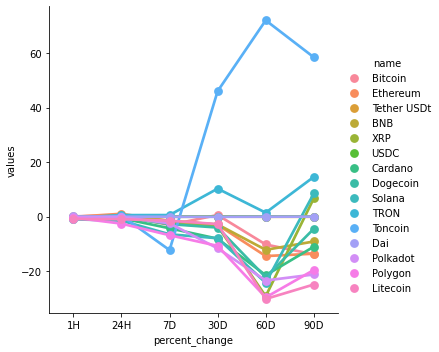

In [58]:
sns.catplot(x='percent_change', y='values',hue='name', data=df8 ,kind='point')

In [63]:
df10= df[['name','quote.USD.price','timestamp']]
df10=df10.query("name=='Bitcoin'")
df10= df10.rename(columns={'quote.USD.price':'Price'})
df10

,name,Price,timestamp
0,Bitcoin,26287.12312,2023-09-27 15:28:17.696836


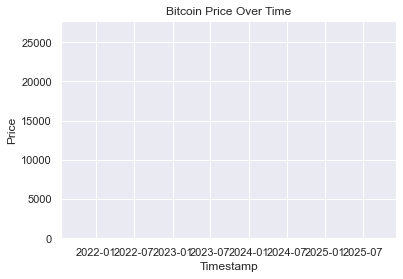

In [66]:
sns.set_theme(style="darkgrid") # no graph if API ran only once
sns.lineplot(x='timestamp', y='Price',data=df10)
plt.ylim(bottom=0)  # Adjust this as needed

# Optionally, add labels and a title
plt.xlabel('Timestamp')
plt.ylabel('Price')
plt.title('Bitcoin Price Over Time')

plt.show()